

# Project: Investigate No-Show Appointments DataSet

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction to No-Show Appointment DataSet

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
> 
# Question Analysed 
## 1.What was the ratio of patients who didn't show up for the appointment
## 2.What is the Age Distribution on patients who didnot Show up versus patients who showed up  ?
## 3.Is there relationship between patients having Scholarship and not showing up for their appointment?
## 4.Is there a relationship between patients not showing up for their appointment because they did not receive SMS

In [1]:
#  import packages 
#  
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties
### Analyse data type,size,null,duplicates,unique


In [2]:
## Load data in datafram
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
#Size
df.shape

(110527, 14)

In [5]:
# Data Type
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [6]:
# number of Unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [7]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [9]:
# number of duplicated rows
sum(df.duplicated())

0

In [10]:
# check null values
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [11]:
# check null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### Above analysis shows data doesn't have nulls and duplicate values

In [12]:
# check the general distribution of the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## Data Cleaning

In [13]:
#  Maximum age
max(df['Age'])

115

In [14]:
# Minimum age 
min(df['Age'])

-1

In [15]:
# find row with negative age
df[df['Age'] == -1].head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


### There is only one row existence of age = -1 ,which seems insignificant for analysis and can be dropped

In [16]:
#as this patient with negative age is only one occurrence it is fine to delete the record
df = df.loc[df['Age'] > -1]

In [17]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [18]:
# check the general distribution of the data including categorical data
df.describe(include='all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105260e+05,1.105260e+05,110526,110526,110526,110526.000000,110526,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526
unique,NaN,NaN,2,103548,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71839,24,4691,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88207
mean,1.474934e+14,5.675304e+06,NaN,NaN,NaN,37.089219,NaN,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,NaN
std,2.560943e+14,7.129544e+04,NaN,NaN,NaN,23.110026,NaN,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172536e+12,5.640285e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680572e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.438963e+13,5.725523e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


### Rename incorrect column names.

In [19]:
# Rename incorrect column names.
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap','No-show' : 'NoShow','SMS_received':'SMSreceived'})

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110526 non-null  float64
 1   AppointmentID   110526 non-null  int64  
 2   Gender          110526 non-null  object 
 3   ScheduledDay    110526 non-null  object 
 4   AppointmentDay  110526 non-null  object 
 5   Age             110526 non-null  int64  
 6   Neighbourhood   110526 non-null  object 
 7   Scholarship     110526 non-null  int64  
 8   Hypertension    110526 non-null  int64  
 9   Diabetes        110526 non-null  int64  
 10  Alcoholism      110526 non-null  int64  
 11  Handicap        110526 non-null  int64  
 12  SMSreceived     110526 non-null  int64  
 13  NoShow          110526 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


### Drop the columns which will not be significant for the analysis

In [21]:
# drop appointmentId,patientId,ScheduledDay,AppointmentDay  as it bears no significance to the analysis
df.drop(['AppointmentID','PatientId','ScheduledDay','AppointmentDay'], axis=1,inplace=True)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Gender         110526 non-null  object
 1   Age            110526 non-null  int64 
 2   Neighbourhood  110526 non-null  object
 3   Scholarship    110526 non-null  int64 
 4   Hypertension   110526 non-null  int64 
 5   Diabetes       110526 non-null  int64 
 6   Alcoholism     110526 non-null  int64 
 7   Handicap       110526 non-null  int64 
 8   SMSreceived    110526 non-null  int64 
 9   NoShow         110526 non-null  object
dtypes: int64(7), object(3)
memory usage: 9.3+ MB


#### Replace NoShow column data values to 1 and 0 . Yes = "1" (didnot show up) , No = "0" (showed up) .                                                 Then Convert NoShow to int64 to understand the correlations better. This is done to analyze better as numerical values can be used easily in statistical functions. NoShow will be used as independent variable in this analysis and will be compared against many other variable to see if there could be any cause relationship between them

In [23]:
df["NoShow"].replace({"Yes":"1","No":"0"},inplace=True)


In [24]:
df['NoShow'] = df['NoShow'].astype('int64')

In [25]:
#check the conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Gender         110526 non-null  object
 1   Age            110526 non-null  int64 
 2   Neighbourhood  110526 non-null  object
 3   Scholarship    110526 non-null  int64 
 4   Hypertension   110526 non-null  int64 
 5   Diabetes       110526 non-null  int64 
 6   Alcoholism     110526 non-null  int64 
 7   Handicap       110526 non-null  int64 
 8   SMSreceived    110526 non-null  int64 
 9   NoShow         110526 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 9.3+ MB


In [26]:
#check the distribution now
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,NoShow
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.201934
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


## Exploratory Data Analysis

### Create an edited CSV from cleaned data and recreate the dataframe

In [27]:
df.to_csv('noshowappointment_v1.csv', index=False)

In [28]:
df = pd.read_csv('noshowappointment_v1.csv')

### Run a corelation graph to best understand the relationship between variables

In [29]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v
df.corr(method=histogram_intersection)

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,NoShow
Age,1.0,10809.0,21801.0,7943.0,3360.0,2458.0,34585.0,21680.0
Scholarship,10809.0,1.0,1884.0,569.0,528.0,178.0,3505.0,2578.0
Hypertension,21801.0,1884.0,1.0,6486.0,1327.0,968.0,6870.0,3772.0
Diabetes,7943.0,569.0,6486.0,1.0,332.0,399.0,2356.0,1430.0
Alcoholism,3360.0,528.0,1327.0,332.0,1.0,78.0,847.0,677.0
Handicap,2458.0,178.0,968.0,399.0,78.0,1.0,536.0,407.0
SMSreceived,34585.0,3505.0,6870.0,2356.0,847.0,536.0,1.0,9784.0
NoShow,21680.0,2578.0,3772.0,1430.0,677.0,407.0,9784.0,1.0


### Corelation Visualization

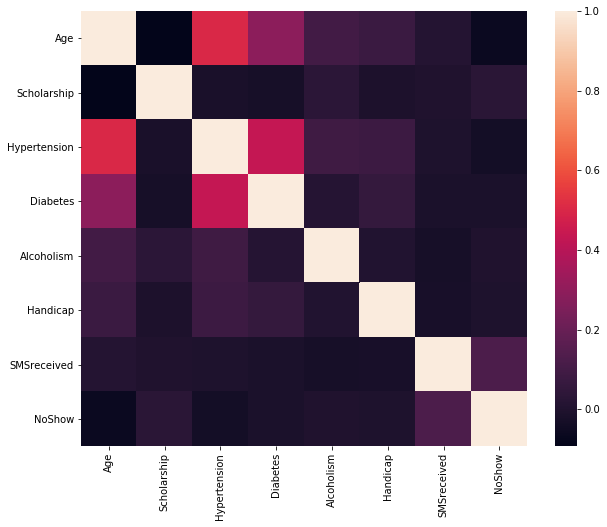

In [30]:

f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

#### Above chart shows NoShow had strong relationship between Age, SMSReceived, Hypertension,Scholarship in the order


### Research Question 1 :
### What was the ratio of patients who didn't show up for the appointment

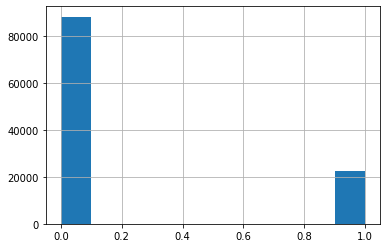

In [31]:
df['NoShow'].hist();

In [32]:
total_count=df.count().NoShow

In [33]:
df.NoShow.value_counts()


0    88207
1    22319
Name: NoShow, dtype: int64

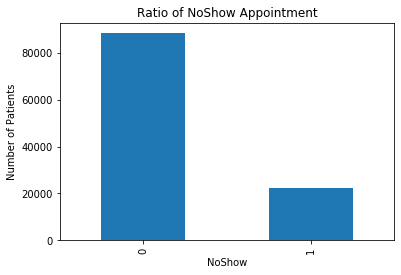

In [34]:
# Number of noShow vs ShowUp
#get total counts for each ShowUp & DidnotShowUp 0=ShowUp 1=DidnotShowUp
ShowCount = df.groupby('NoShow').count()['Age']

# title and labels
plt.xlabel('Appointment Status')
plt.ylabel('Number of Patients')
plt.title('Ratio of NoShow Appointment')
ShowCount.plot(kind='bar')


In [35]:
# get proportios by dividing DidNot showup counts by total # of count
DidnotShowup = (ShowCount[1] /total_count) * 100
#total_count
DidnotShowup


20.193438647919944

In [36]:
ShowUp = (ShowCount[0]*100/total_count) 
ShowUp 

79.80656135208005

Text(0.5, 1.0, 'Ratio of NoShow Appointment')

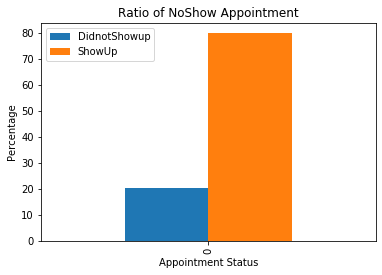

In [37]:
compare = pd.DataFrame({'DidnotShowup':[DidnotShowup] ,'ShowUp':[ShowUp] })
compare.plot(kind='bar')

# title and labels
plt.xlabel('Appointment Status')
plt.ylabel('Percentage')
plt.title('Ratio of NoShow Appointment')




#### Above analysis shows 20% patients didn't show up for their appointment
#### ---------------------------------------------------------------------------------------------------------------------------------------

### Research Question 2 : 
### What is the Age Distribution on patients who didnot Show up versus patients who showed up  ?

#### Below code will split the dataframe into  didnotshow and showup. These split df will be used in further analysis to compare bivariate behaviour 

In [38]:
# ‘No’ or '0' if the patient showed up to their appointment, and 
# ‘Yes’ or '1' if they did not show up.

ShowN = df.NoShow == 1
ShowUp = df.NoShow == 0


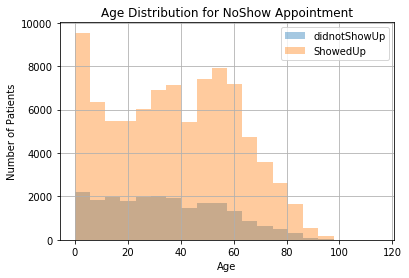

In [39]:
df.Age[ShowN].hist(alpha=0.4,bins=20,label='didnotShowUp')
df.Age[ShowUp].hist(alpha=0.4,bins=20,label='ShowedUp')
# title and labels
plt.style.use('seaborn-deep')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Age Distribution for NoShow Appointment')
plt.legend()

#### Separating ages in age groups would also help to see any possible age trend not able to show up

In [40]:
bin_edges = [-1,0,5,13,18,65,115]
bin_names = ['babies','preschool','preteen','teen','adult','senior']


In [41]:
df['Age_groups'] = pd.cut(df['Age'],bin_edges,labels=bin_names)

df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,NoShow,Age_groups
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0,adult
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0,adult
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,0,adult
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,preteen
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0,adult


#### Slice the df dataframe into didnotshow and showup. This will be used in further analysis

In [42]:
didnotshow = df[ShowN]
showup = df[ShowUp]

In [43]:
Group1 = didnotshow.groupby('Age_groups')['Age'].count()

In [44]:

Group2 = showup.groupby('Age_groups')['Age'].count()

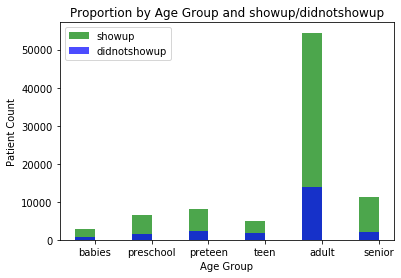

In [45]:
ind = np.arange(len(Group1)) # the x locations for the groups
ind = np.arange(len(Group1)) # the x locations for the groups
width = 0.35 #the width of the bar

showup_bars = plt.bar(ind,Group2,width,color='g',alpha=.7,label='showup')
didnotshow_bars = plt.bar(ind,Group1,width,color='b',alpha=.7,label='didnotshowup')

# title and labels
plt.ylabel('Patient Count')
plt.xlabel('Age Group')
plt.title('Proportion by Age Group and showup/didnotshowup')
locations = ind + width / 2  #xtick locations
labels = bin_names  #xtick labels
plt.xticks(locations, labels)
plt.legend()#legends



### Above analysis shows more adults didnot show up for their appoinment
### ------------------------------------------------------------------------------------------------------------------------------

### Research Question 3:
### Is there relationship between patients having Scholarship and not showing up for their appointment?

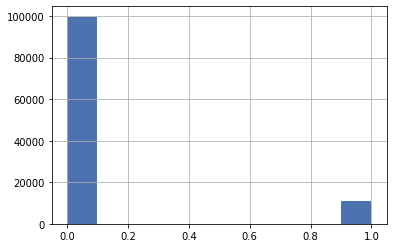

In [46]:

df['Scholarship'].hist();

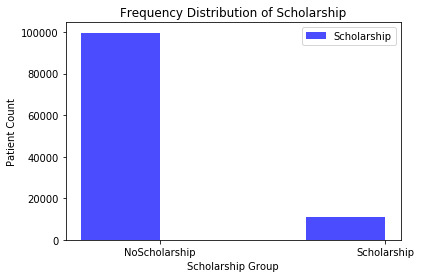

In [58]:
Group1 = df.Scholarship.value_counts()
ind = np.arange(len(Group1)) # the x locations for the groups
Scholarship_bars = plt.bar(ind,Group1,width,color='b',alpha=.7,label='Scholarship')
plt.ylabel('Patient Count')
plt.xlabel('Scholarship Group')
plt.title('Frequency Distribution of Scholarship')
locations = ind + width / 2  #xtick locations
labels = ['NoScholarship','Scholarship']  #xtick labels
plt.xticks(locations, labels)
plt.legend()#legends



In [59]:
## separate the groups as per the scholarship/NoShow
group1 = didnotshow.groupby('Scholarship')['NoShow'].value_counts()
group2 = showup.groupby('Scholarship')['NoShow'].value_counts()



In [60]:
noShowupScholarNo = (group1[1] /total_count) * 100
noShowupScholarYes = (group1[0] /total_count) * 100
ShowupScholarNo = (group2[1] /total_count) * 100
ShowupScholarYes = (group2[0] /total_count) * 100

In [61]:
compare = pd.DataFrame({'noShowupScholarNo':noShowupScholarNo ,'noShowupScholarYes':noShowupScholarYes,
                        'ShowupScholarNo':ShowupScholarNo ,'ShowupScholarYes':ShowupScholarYes })
compare.head()

,noShowupScholarNo,noShowupScholarYes,ShowupScholarNo,ShowupScholarYes
NoShow,,,,
0,NaN,NaN,7.494164,72.312397
1,2.332483,17.860956,NaN,NaN


Text(0.5, 1.0, 'Ratio of Scholarship NoShow Behaviour')

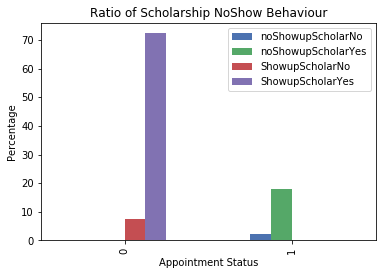

In [62]:
compare.plot(kind='bar')

# title and labels
plt.xlabel('Appointment Status')
plt.ylabel('Percentage')
plt.title('Ratio of Scholarship NoShow Behaviour')


#### Above analysis shows there is no strong relationship between patients not showing up for their appointment due to lack of scholarship

### Research Question 4
### Is there a relationship between patients not showing up for their appointment because they did not receive SMS?

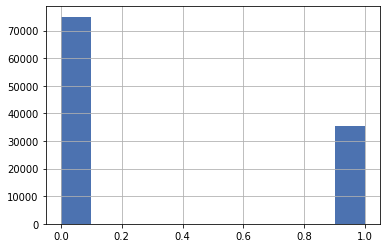

In [63]:
df['SMSreceived'].hist();

In [64]:
gb = didnotshow.groupby(['SMSreceived','Age_groups']).agg({'Hypertension': [np.size]})


In [65]:
#get the keys of age_group
Age_groups=didnotshow.groupby(['Age_groups']).groups.keys()


In [66]:
NoSMSRecved= gb.loc[0]['Hypertension']['size']

In [67]:
SMSRecved= gb.loc[1]['Hypertension']['size']

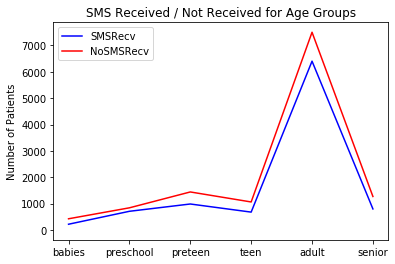

In [68]:
ind = np.arange(len(gb)) # the x locations for the groups
N = 6
ind = np.arange(N)    # the x locations for the groups
width = 0.35      # the width of the bars: can also be len(x) sequence

p1 = plt.plot(ind, SMSRecved, width, color='b')
p2 = plt.plot(ind, NoSMSRecved, width,color='r')
             
plt.ylabel('Number of Patients')
plt.title('SMS Received / Not Received for Age Groups')
plt.xticks(ind,Age_groups)
plt.legend((p1[0], p2[0]), ('SMSRecv', 'NoSMSRecv'))

plt.show()

#### Above analysis shows more patients across all age groups didn't receive SMS text informing their upcoming appointment. This can be one cause for not showing up for the appointment 
#### ----------------------------------------------------------------------------------------------------------------------------------------------------

<a id='conclusions'></a>
## Conclusions

### The appointment dataset had most columns with values yes('1') or no('0'). It was more appropriate to use count or size of the data showing yes or no behaviour than comparing mean,median,std. of the dataset. My analysis is based on counts and proportions of the groups. 

### With above limitations I came to below conclusions based on the graphs produced at the end of the each research question:

### Research Question 1 

#### What was the ratio of patients who didn't show up for the appointment
#### Answer:  I calculated the percentage of patients in show-up and didnot show-up groups. My analysis shows 20% patients didn't show up for their appointment

### Research Question 2  

#### What is the Age Distribution on patients who didnot Show up versus patients who showed up  ?
#### Answer: I divided the ages in groups and calculated count of patients in each group for show-up and didnotshow-up group. The graph shows more patients in adult group didnot show up for their appoinment

### Research Question 3
#### Is there relationship between patients having Scholarship and not showing up for their appointment?
#### Answer: I calculated percentage of patients having Scholarship/ not having Scholarship and not showing up for their appointment, my analysis shows there is no strong relationship between patients not showing up for their appointment due to lack of scholarship as percentage of that group is about 2%


### Research Question 4
#### Is there a relationship between patients not showing up for their appointment because they did not receive SMS?
#### Answer : My analysis shows more patients across all age groups didn't receive SMS text informing their upcoming appointment. This can be one cause for not showing up for the appointment 


